In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# import CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [3]:
x_train = X_train.astype('float32') / 255.0
x_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

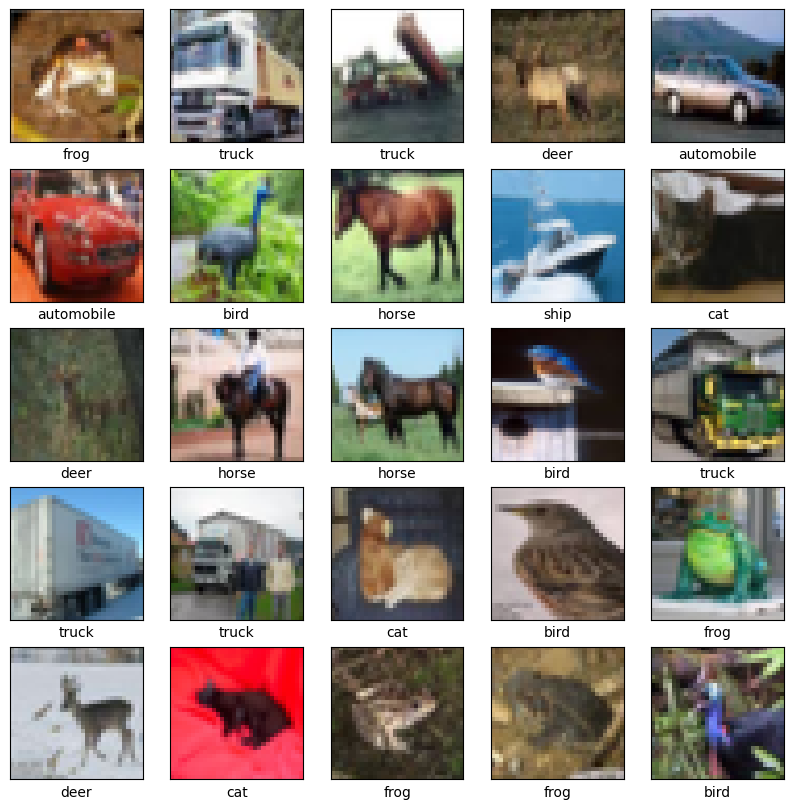

In [4]:
# plot all classes of this dataset 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[np.argmax(y_train[i])])

In [5]:
# apply cnn 

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

d:\programs\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.3769 - loss: 1.8518 - val_accuracy: 0.4644 - val_loss: 1.4633
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.5239 - loss: 1.3284 - val_accuracy: 0.5610 - val_loss: 1.2386
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5821 - loss: 1.1816 - val_accuracy: 0.5910 - val_loss: 1.1521
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6294 - loss: 1.0587 - val_accuracy: 0.6297 - val_loss: 1.0654
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6589 - loss: 0.9776 - val_accuracy: 0.6361 - val_loss: 1.0502
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6827 - loss: 0.9141 - val_accuracy: 0.6042 - val_loss: 1.1806
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7049 - loss: 0.8512 - val_accuracy: 0.6569 - val_loss: 1.0255
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7224 - loss: 0.7959 - 

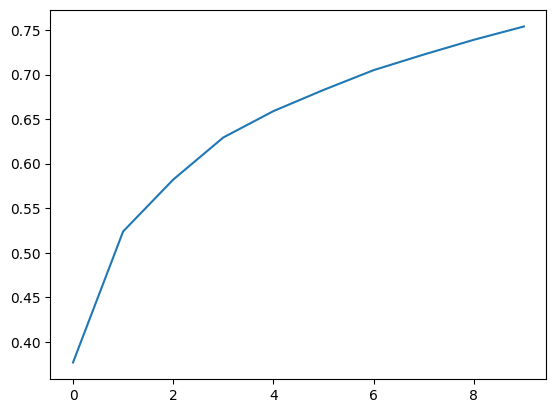

In [8]:
history = model.history.history
plt.plot(history['accuracy'], label='accuracy')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6699 - loss: 1.0224


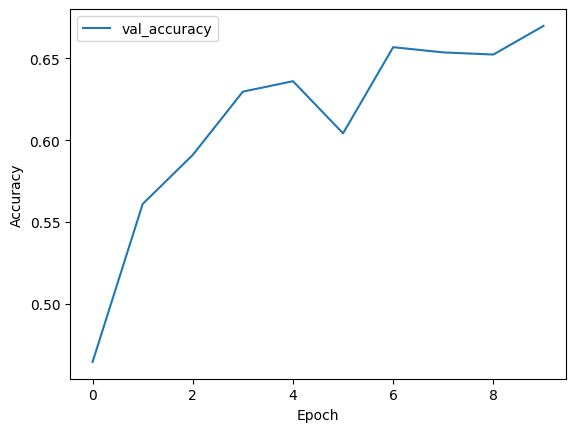

In [10]:
model.evaluate(X_test, y_test)
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


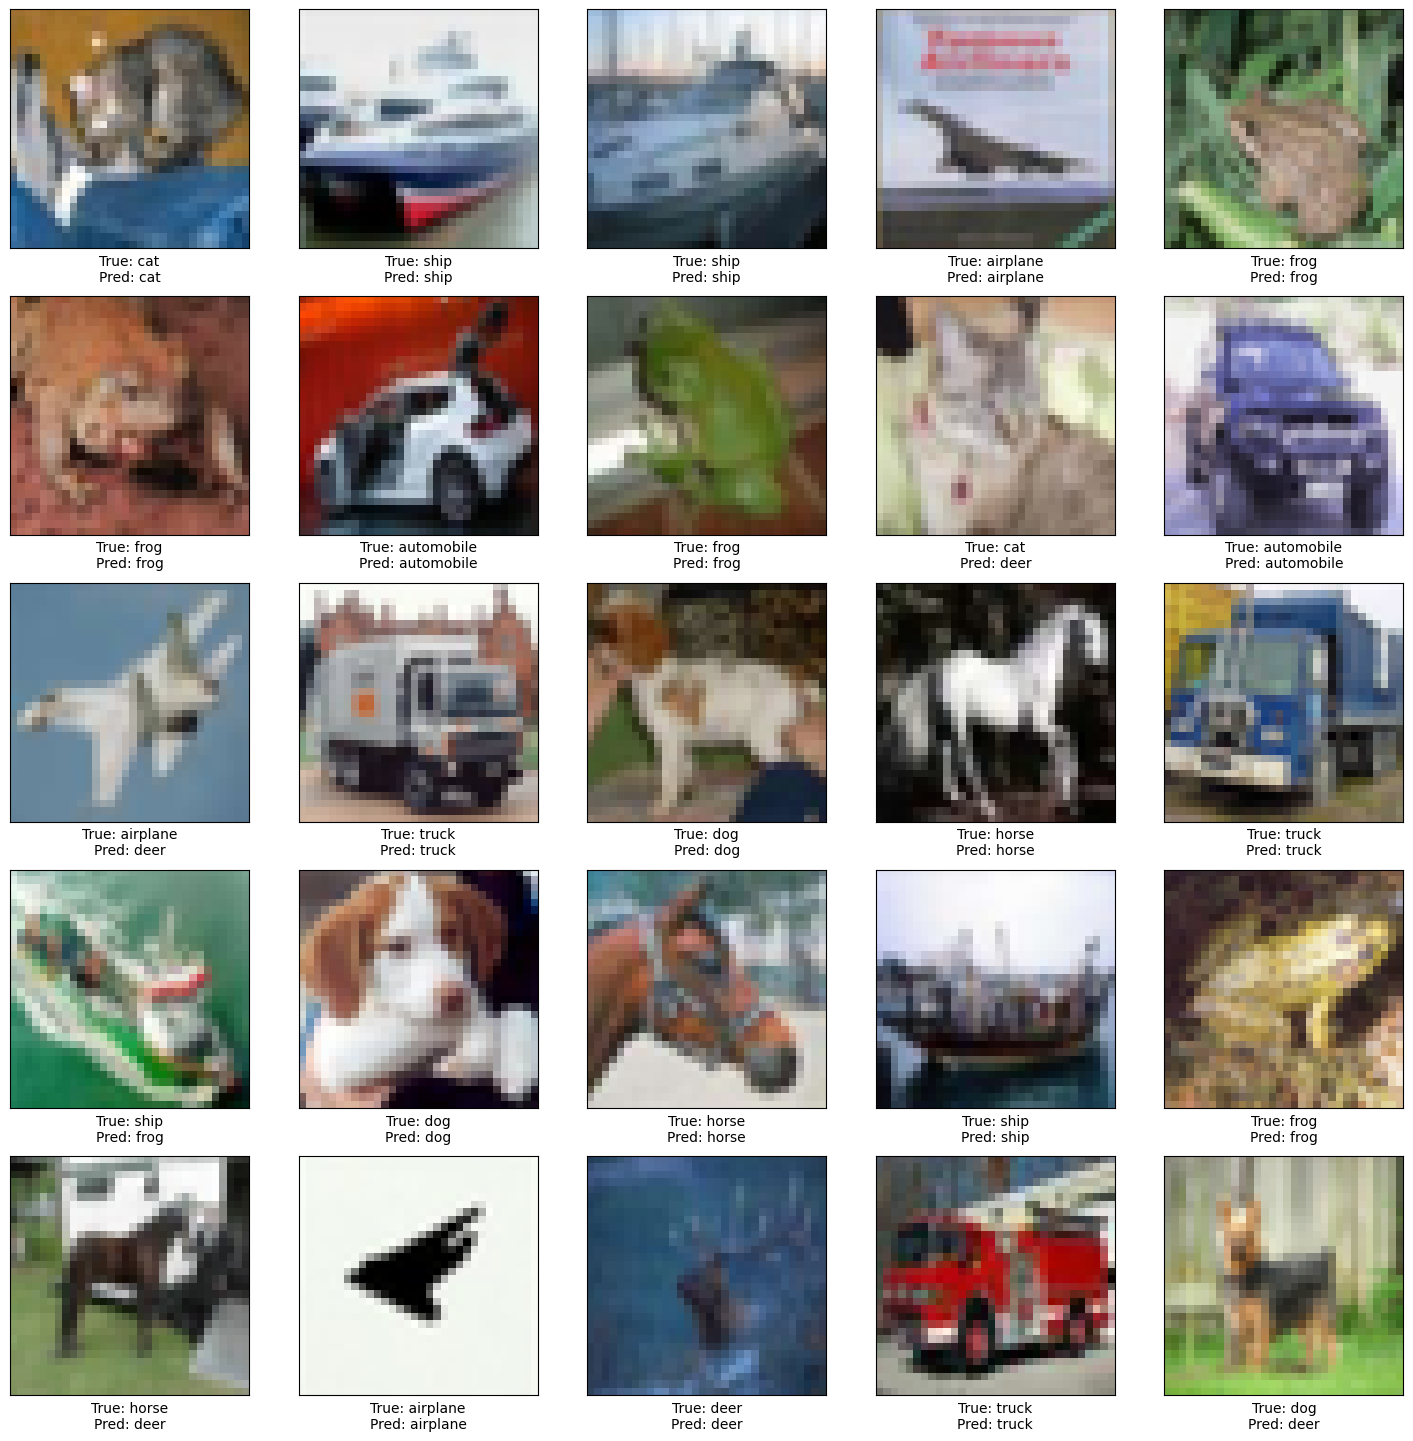

In [13]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

plt.figure(figsize=(18,18))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(f"True: {class_names[y_test_classes[i]]}\nPred: {class_names[y_pred_classes[i]]}")

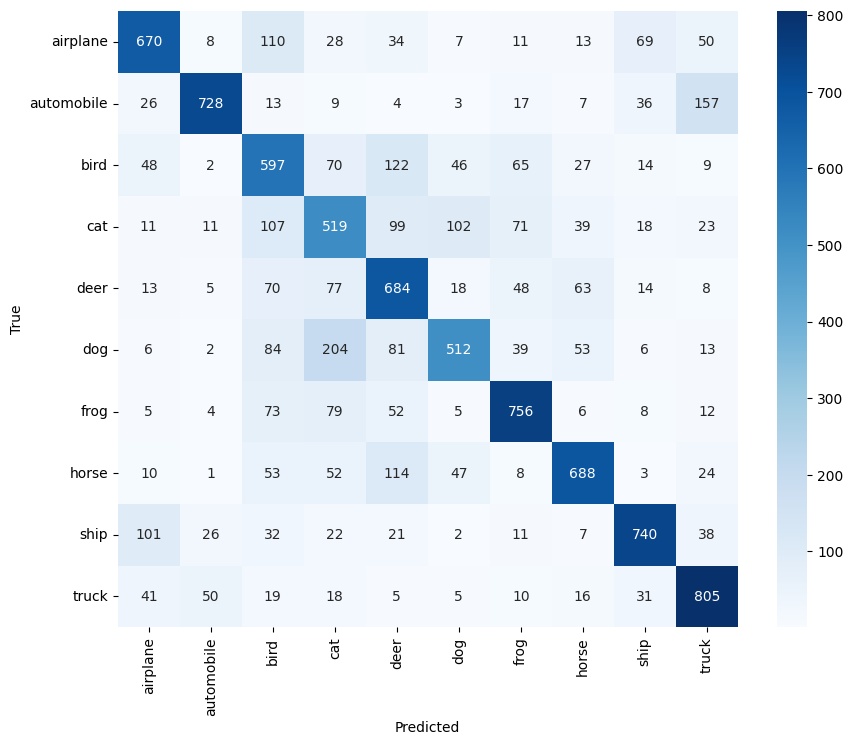

Conclusion: CNN model achieves around 70% accuracy on CIFAR-10 dataset after 10 epochs of training. Further improvements can be made by tuning hyperparameters, adding data augmentation, or using more complex architectures.


In [14]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Conclusion: CNN model achieves around 70% accuracy on CIFAR-10 dataset after 10 epochs of training. Further improvements can be made by tuning hyperparameters, adding data augmentation, or using more complex architectures.")

In [15]:
# precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test_classes, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.72      0.67      0.69      1000
  automobile       0.87      0.73      0.79      1000
        bird       0.52      0.60      0.55      1000
         cat       0.48      0.52      0.50      1000
        deer       0.56      0.68      0.62      1000
         dog       0.69      0.51      0.59      1000
        frog       0.73      0.76      0.74      1000
       horse       0.75      0.69      0.72      1000
        ship       0.79      0.74      0.76      1000
       truck       0.71      0.81      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



#### conclusion: CNN model achieves around 70% accuracy on CIFAR-10 dataset after 10 epochs of training. Further improvements can be made by tuning hyperparameters, adding data augmentation, or using more complex architectures.